<a href="https://colab.research.google.com/github/tchappui/heia-cours-technique-de-reaction/blob/master/Chapitre3/CTR1_Exercice3_4b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercice 3.4bis

Examen d'un réacteur CSTR à l'état transitoire

## Importer les outils

In [0]:
# vecteurs et algèbre linéaire
import numpy as np

# les outils pour visualiser
import matplotlib.pyplot as plt

# le solveur
import scipy.integrate as solveur


## Définir les constantes du problème

In [0]:
k = 0.01 # s-1

# Dans le feed
CAf = 3 # mol/L
CBf = 0 # mol/L
CCf = 0 # mol/L

# Au temps t=0 s
CA0 = CAf # mol/L
CB0 = 0 # mol/L
CC0 = 0 # mol/L

V = 21.45 # L
Vdot = 0.5 # L/s

## Définir les équations à résoudre

In [0]:
def equations(variables, t, k, V, CAf, CBf, CCf, Vdot):
    NA, NB, NC = variables
    
    CA = NA / V
    CB = NB / V
    CC = NC / V
    
    r = k * CA
    
    RA = -r
    RB = r
    RC = r
    
    dNAdt = RA * V + Vdot * CAf - Vdot * CA
    dNBdt = RB * V + Vdot * CBf - Vdot * CB
    dNCdt = RC * V + Vdot * CCf - Vdot * CC
    
    return dNAdt, dNBdt, dNCdt

## Définir les conditions initiales

In [0]:
conditions_initiales = [CA0 * V, CB0 * V, CC0 * V]

## Résoudre le problème à l'aide du solveur

In [0]:
t = np.linspace(0, 1000, 1000) # définir les bornes d'intégration

resultats = solveur.odeint(
    equations, 
    conditions_initiales, 
    t, 
    (k, V, CAf, CBf, CCf, Vdot)
)

In [0]:
NA = resultats[:,0]
NB = resultats[:,1]
NC = resultats[:,2]

CA = NA / V
CB = NB / V
CC = NC / V

In [0]:
X = (CAf - CA) / CAf

## Visualiser les résultats

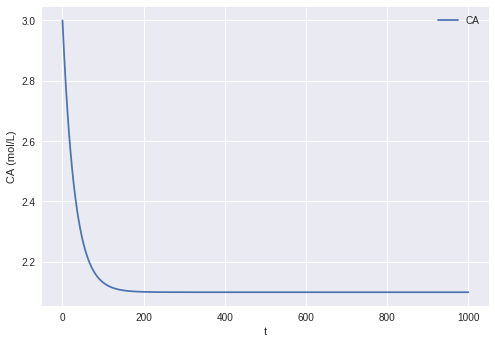

In [69]:
plt.plot(t, CA)
plt.xlabel('t')
plt.ylabel('CA (mol/L)')
plt.legend(['CA'])
plt.show()

In [70]:
t[X > 0.3][0]

218.21821821821823